In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


In [2]:

def function(x):
    """
    定义函数 y = (x+5)**3 + x / 5 - 50
    :param x: 
    :return: 
    """
    x = np.array(x)
    return (x+5)**3 + x / 5 - 50


In [3]:
def showFunction():
    """
    初始化x
    """
    x = np.array(range(100))
    x = [(a + 1) / 10 - 8 for a in x]

    """
    可视化，可见解在-2~0之间
    """
    y = function(x)
    plt.scatter(x, y)
    plt.show()


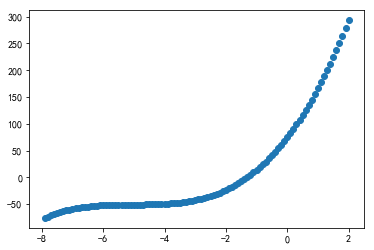

In [4]:
showFunction()

In [5]:
def loss(x_new, x_old):
    """
    相对误差
    :param x_new:
    :param x_old:
    :return:
    """
    # print(x_new,x_old)
    try:
        loss = abs((x_new - x_old) / x_new)
    except ZeroDivisionError:
        loss = abs(x_new - x_old)
    return loss


In [6]:
print(loss(1,2)) #测试

1.0


In [7]:

def dichotomization(x1, x2, x_old):
    """
    二分法计算新点
    :param x1:
    :param x2:
    :return: 新的x1 and x2  and loss
    """
    y1 = function(x1)
    y2 = function(x2)
    if y1 * y2 > 0:
        print("二分法:输入区间不对")
        return
    x_new = (x1 + x2) / 2.0
    # print(x_new)
    l = loss(x_new=x_new, x_old=x_old)
    y_new = function(x_new)
    if (y1 * y_new < 0):
        x2 = x_new
    elif (y2 * y_new < 0):
        x1 = x_new
    else:
        x1 = x2 = x_new
    return x1, x2, l, x_new


In [8]:

def regulaFalsi(x1, x2, x_old):
    """
    试位法计算新点
    :param x1:
    :param x2:
    :return: 新的x1 and x2
    """
    if x1 > x2:
        # 确保x1小于x2
        x1 += x2
        x2 = x1 - x2
        x1 -= x2
    y1 = function(x1)
    y2 = function(x2)
    if y1 * y2 > 0:
        print("试位法：输入区间不对")
        return
    x_new = x1 + abs((x2 - x1) * y1 / (y2 + y1))
    l = loss(x_new=x_new, x_old=x_old)
    y_new = function(x_new)
    if (y1 * y_new < 0):
        x2 = x_new
    elif (y2 * y_new < 0):
        x1 = x_new
    else:
        x1 = x2 = x_new
    return x1, x2, l, x_new

In [9]:
def stepsCountLimit(steps):
    """
    以搜索次数为限制（弹出条件）
    在[-200,150]中搜索 ， 通过修改d_x1 , r_x1 , d_x2 , r_x2设定
    :param steps: 搜索次数
    :return: loss
    """
    dichotomy_loss = []
    regulafalsi_loss = []
    d_x1 = r_x1 = -200
    d_x2 = r_x2 = 150
    d_x_old = r_x_old = -200
    for i in range(steps):
        d_x1, d_x2, d_loss, d_x_old = \
            dichotomization(d_x1, d_x2, d_x_old)

        r_x1, r_x2, r_loss, r_x_old = \
            regulaFalsi(r_x1, r_x2, r_x_old)

        dichotomy_loss.append(d_loss)
        regulafalsi_loss.append(r_loss)
        # print(d_loss,r_loss)

    plt.figure()
    plt.subplot(211)
    plt.plot(range(len(dichotomy_loss)), dichotomy_loss)
    plt.title("二分法loss")

    plt.subplot(212)
    plt.plot(range(len(regulafalsi_loss)), regulafalsi_loss)
    plt.title("试位法loss")
    plt.show()


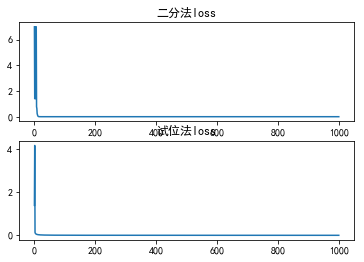

In [10]:
stepsCountLimit(1000)

In [11]:

def breakByLoss(lossLimit):
    """
    以loss为弹出条件
    :param lossLimit:
    :return:
    """
    dichotomy_loss = []
    regulafalsi_loss = []
    d_x1 = r_x1 = -2
    d_x2 = r_x2 = 100
    d_x_old = r_x_old = -200
    d_loss = r_loss = 100

    while (d_loss > lossLimit):
        d_x1, d_x2, d_loss, d_x_old = \
            dichotomization(d_x1, d_x2, d_x_old)
        dichotomy_loss.append(d_loss)

    while (r_loss > lossLimit):
        r_x1, r_x2, r_loss, r_x_old = \
            regulaFalsi(r_x1, r_x2, r_x_old)
        regulafalsi_loss.append(r_loss)

    plt.figure()
    plt.subplot(211)
    plt.plot(range(len(dichotomy_loss)), dichotomy_loss)
    plt.title("二分法loss")

    plt.subplot(212)
    plt.plot(range(len(regulafalsi_loss)), regulafalsi_loss)
    plt.title("试位法loss")
    plt.show()

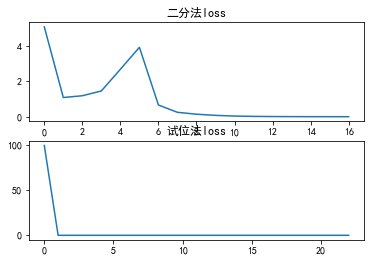

In [12]:
breakByLoss(lossLimit=1e-3)

#### 发现问题
 * 试位法在初始点其中一个离正确值较近时，另一个相对较远时确实比二分法快
 * 在我写的函数上，二分法能够找到正确值（准确的），试位法只能无限逼近

#### 解决  (问题前提是在区间内只有唯一解)
* 第一个秦老师在课上已讲
* 第二个是函数问题如下图

![](https://ws1.sinaimg.cn/large/0067fcixly1fxcc49mcpbj32bc3341kz.jpg)